In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
from os import listdir
import timeit
from collections import defaultdict

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from scripts import *

In [4]:
DIR = 'D:\\Гдиск\\Study\\01.Jupyter\\NLA_face_recognition\\data\\faces\\'

In [5]:
filenames = pd.DataFrame(list_files(DIR, "subject", remove_duplicates=True))

In [6]:
df = create_dataframe(filenames)

In [7]:
df

,subject,category,2,filename
0,1,centerlight,pgm,subject01.centerlight.pgm
1,1,glasses,pgm,subject01.glasses.pgm
2,1,happy,pgm,subject01.happy.pgm
3,1,leftlight,pgm,subject01.leftlight.pgm
4,1,noglasses,pgm,subject01.noglasses.pgm
...,...,...,...,...
160,15,rightlight,pgm,subject15.rightlight.pgm
161,15,sad,pgm,subject15.sad.pgm
162,15,sleepy,pgm,subject15.sleepy.pgm
163,15,surprised,pgm,subject15.surprised.pgm


# Наивная реализация  
никакой агрегации на фотографиях, сравнение по l2-норме, датасет не центрированный

In [11]:
data, labels = extract_image_data(df, DIR)

In [16]:
test_predictor(predict, data, labels, k=1 )

0.806060606060606

Центрированный датасет

In [13]:
DIR = 'D:\\Гдиск\\Study\\01.Jupyter\\NLA_face_recognition\\data\\centered\\'

In [14]:
data, labels = extract_image_data(df, DIR, h=195, w=231)

In [16]:
test_predictor(predict, data, labels, k=1 )

0.8484848484848485

# Агрегация по фотографиям - среднее
L2-норма, нецентрированный датасет

In [17]:
DIR = 'D:\\Гдиск\\Study\\01.Jupyter\\NLA_face_recognition\\data\\faces\\'

In [18]:
data, labels = extract_image_data(df, DIR)

In [19]:
mean_data, mean_labels = extract_image_data(df, DIR, 'Mean')

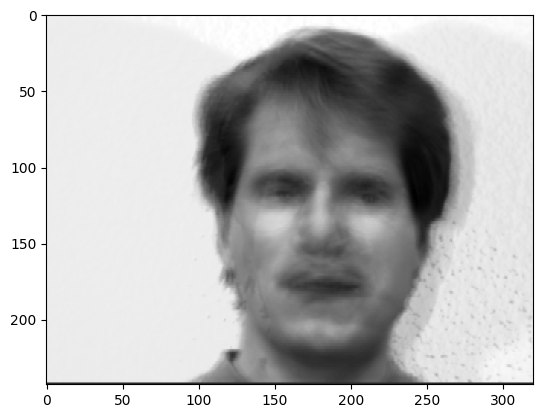

In [23]:
for i in range(1):
    plt.imshow(mean_data[:, :, i],cmap='gray')
    plt.show()

In [24]:
def test_mean_prtedictor(dir):
    
    counter = 0
    for i in range(df.shape[0]):
        train_data, train_labels = extract_image_data(df.drop(i), dir, 'Mean')
        #print(i)
        target = data[:, :, i]
        target_label = labels[i]
        
        vector_result = predict(data=train_data, labels=train_labels, target=target, target_label=target_label, k=1)
        
        if vector_result == target_label.split('.')[0]:
            #print(vector_result, ': True answer')
            counter += 1
    print(counter / data.shape[2]) 

In [26]:
 def test_mean_prtedictor(DIR)

0.6606060606060606


Центрированный датасет

In [29]:
DIR = 'D:\\Гдиск\\Study\\01.Jupyter\\NLA_face_recognition\\data\\centered\\'

In [30]:
mean_data, mean_labels = extract_image_data(df, DIR, 'Mean', h=195, w=231)

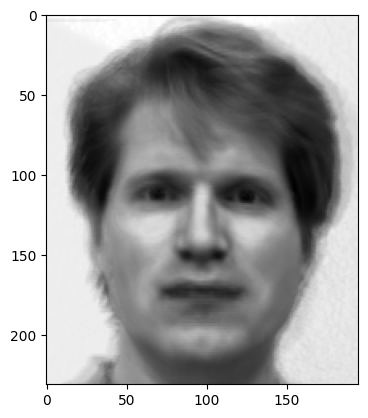

In [31]:
for i in range(1):
    plt.imshow(mean_data[:, :, i],cmap='gray')
    plt.show()

In [32]:
data, labels = extract_image_data(df, DIR, h=195, w=231)

In [33]:
counter = 0
for i in range(df.shape[0]):
    train_data, train_labels = extract_image_data(df.drop(i), DIR, 'Mean', h=195, w=231)
    #print(i)
    target = data[:, :, i]
    target_label = labels[i]
    
    vector_result = predict(data=train_data, labels=train_labels, target=target, target_label=target_label, k=1)
    
    if vector_result == target_label.split('.')[0]:
        #print(vector_result, ': True answer')
        counter += 1
print(counter / data.shape[2]) 

0.8484848484848485


# SVD реализация

In [8]:
DIR = 'D:\\Гдиск\\Study\\01.Jupyter\\NLA_face_recognition\\data\\faces\\'

In [9]:
full_data, full_labels = extract_image_data(df, DIR)

In [10]:
data, labels = extract_image_data(df, DIR, 'SVD')

In [11]:
data.shape

(77760, 10, 15)

In [13]:
U, S, Vh = np.linalg.svd(data[:, :, 4], full_matrices=False)

In [14]:
U.shape

(77760, 10)

In [15]:
S

array([176267.35028934,  25107.17818591,  10935.46023494,   7999.60148804,
         5385.10422708,   4326.35219169,   3292.35334595,   3008.30550513,
         2239.50342979,   1246.95228312])

In [16]:
U

array([[-2.07374470e-03,  1.14732779e-03,  1.52978170e-03, ...,
        -3.48035701e-04,  4.16009449e-04,  1.52900606e-04],
       [-4.35724055e-03,  1.44159687e-03,  2.50310174e-03, ...,
        -2.79575536e-04,  2.65730093e-04, -6.24296253e-04],
       [-4.39521497e-03,  1.41034340e-03,  2.22720687e-03, ...,
        -4.26739451e-04,  9.43925510e-05, -2.31134422e-04],
       ...,
       [-1.70379240e-03, -3.07418924e-03,  2.95560329e-03, ...,
         3.60890567e-04,  1.77205801e-03,  6.51822160e-04],
       [-1.91254081e-03, -3.29336155e-03,  3.30129357e-03, ...,
         1.03617662e-04,  2.00286404e-03,  8.88743582e-04],
       [-1.20516718e-03, -5.22103665e-04,  2.67817023e-03, ...,
        -1.57414115e-04, -1.90522805e-05, -1.18927426e-04]])

# столбцы матрицы U вычленяют важную ифнормацию из исходной матрицы!

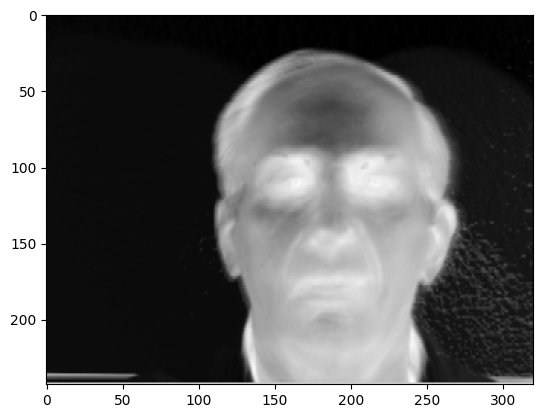

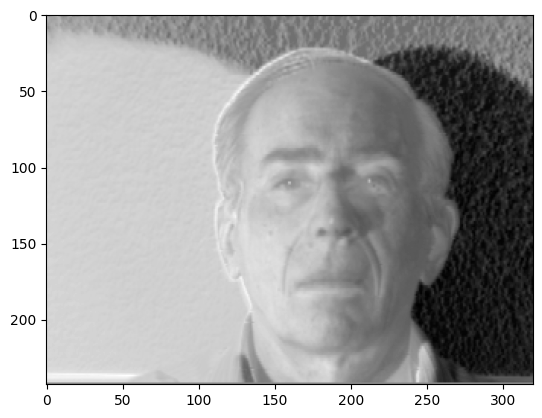

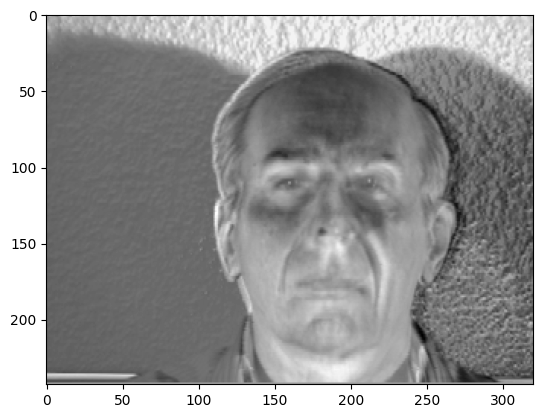

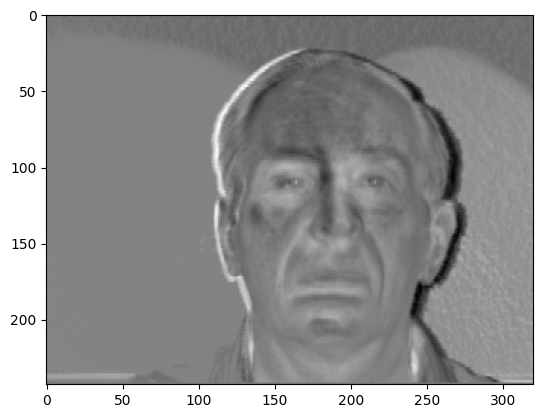

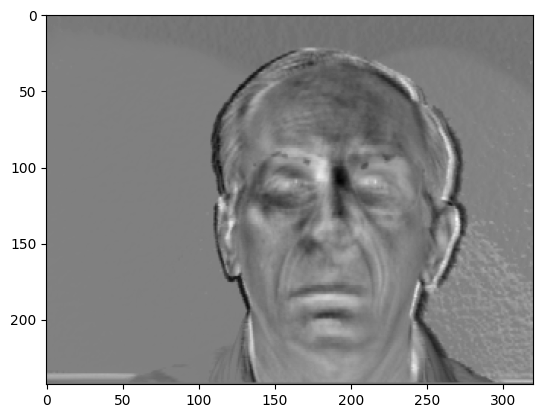

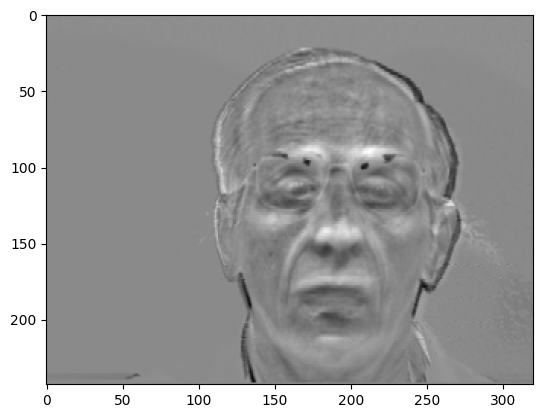

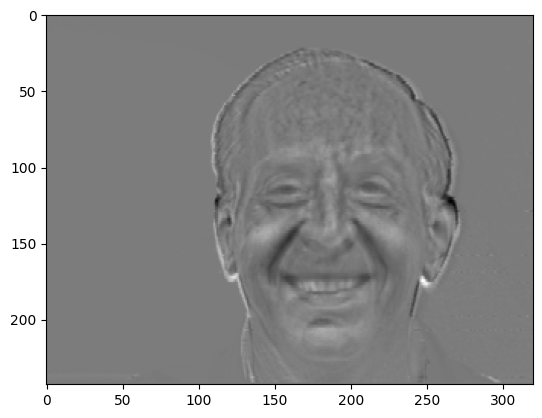

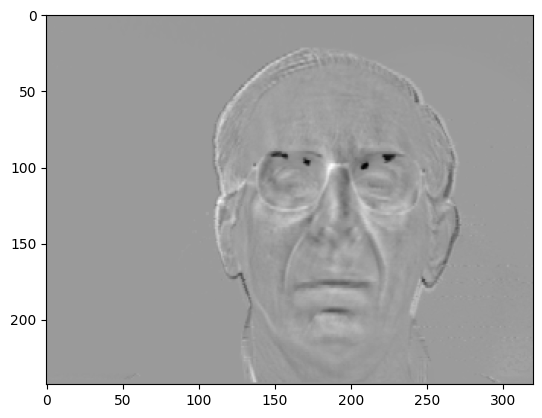

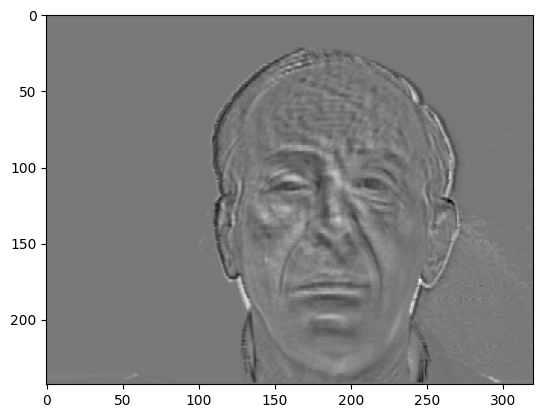

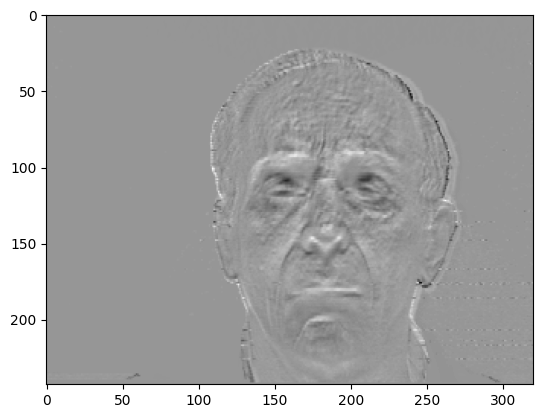

In [17]:
for i in range(10):
    plt.imshow(U[:, i].reshape(320, 243).T,cmap='gray')
    plt.show()

In [18]:
Vh.shape

(10, 10)

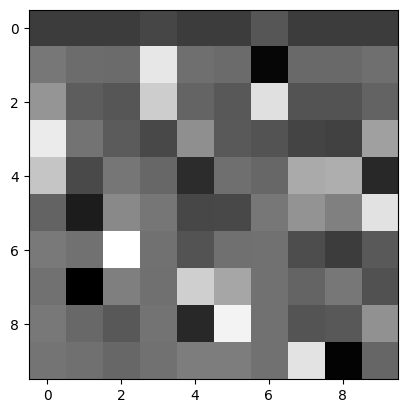

In [19]:
plt.imshow(Vh,cmap='gray')
plt.show()

# Наилучшее приближение искомого фото линейными комбинациями матриц U 
Это Least Squares Problem

In [20]:
U_data = np.zeros(data.shape)
for i in range(data.shape[2]):
    U, S, Vh = np.linalg.svd(data[:, :, i], full_matrices=False)
    print(np.linalg.cond(U))
    U_data[:, :, i] = U
    


1.0000000000001232
1.0000000000000238
1.000000000000133
1.0000000000000582
1.0000000000001001
1.0000000000001732
1.0000000000001885
1.0000000000003304
1.000000000000084
1.0000000000000886
1.000000000000105
1.000000000000066
1.0000000000001548
1.0000000000002447
1.0000000000000486


In [21]:
for k in range(1, U_data.shape[1] + 1):
    U_data_train = U_data[:, :k, :]
    counter = 0
    for i in range(1, 16):
        target = full_data[:, :, i * 11 - 1].flatten(order='F')
        target_label = full_labels[i * 11 - 1]
        
        
        vector_result = predict_svd(data=U_data_train, labels=labels, target=target, target_label=target_label, k=1)

        if vector_result == target_label.split('.')[0]:
            counter += 1
    print(counter / 16)

0.8125
0.8125
0.9375
0.9375
0.9375
0.9375
0.9375
0.9375
0.9375
0.9375


# SVD на центрированном датасете

In [50]:
DIR = 'D:\\Гдиск\\Study\\01.Jupyter\\NLA_face_recognition\\data\\centered\\'

In [51]:
full_data, full_labels = extract_image_data(df, DIR, w=231, h=195)

In [52]:
data, labels = extract_image_data(df, DIR, 'SVD', w=231, h=195)

In [53]:
U, S, Vh = np.linalg.svd(data[:, :, 4], full_matrices=False)

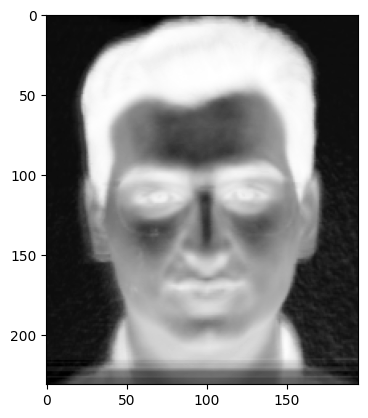

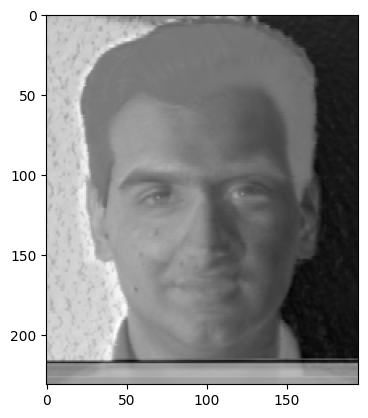

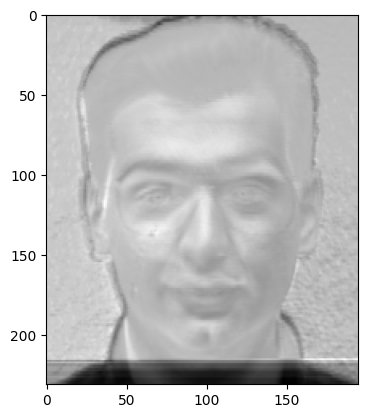

In [57]:
for i in range(3):
    plt.imshow(U[:, i].reshape(195, 231).T,cmap='gray')
    plt.show()

In [55]:
U_data = np.zeros(data.shape)
for i in range(data.shape[2]):
    U, S, Vh = np.linalg.svd(data[:, :, i], full_matrices=False)
    print(np.linalg.cond(U))
    U_data[:, :, i] = U

1.000000000000045
1.000000000000002
1.0000000000000502
1.0000000000000155
1.0000000000000167
1.0000000000000124
1.0000000000000946
1.000000000000062
1.0000000000000564
1.0000000000000449
1.0000000000000062
1.0000000000000169
1.0000000000000682
1.000000000000059
1.0000000000000175


In [56]:
for k in range(1, U_data.shape[1] + 1):
    U_data_train = U_data[:, :k, :]
    counter = 0
    for i in range(1, 16):
        target = full_data[:, :, i * 11 - 1].flatten(order='F')
        target_label = full_labels[i * 11 - 1]

        vector_result = predict_svd(data=U_data_train, labels=labels, target=target, target_label=target_label, k=1)

        if vector_result == target_label.split('.')[0]:
            counter += 1
    print(counter / 16)

0.875
0.9375
0.9375
0.9375
0.9375
0.9375
0.9375
0.9375
0.9375
0.9375
